In [1]:
from nltk import TweetTokenizer, SnowballStemmer
from nltk.corpus import stopwords
from pymongo import MongoClient
from spellchecker import SpellChecker

import certifi

import emoji
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import openpyxl
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import re
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from operator import itemgetter
from matplotlib import cm
from nltk.corpus import stopwords
from nltk import bigrams
import collections
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\modze\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Stałe

In [2]:
ACRONYMS = {
    "cuz": "because",
    "tn": "tonight",
    "dr": "doctor",
    "u": "you",
    "r": "are",
    "ny": "new york",
    "afaik": "as far as i know",
    "bts": "behind the scenes",
    "cba": "can't be bothered",
    "dnd": "do not disturb",
    "eli5": "explain like i'm 5",
    "fomc": "federal open market committee",
    "g2g": "got to go",
    "hmu": "hit me up",
    "kpi": "key performance indicator",
    "nbd": "no big deal",
    "potus": "president of the united states",
    "rip": "rest in peace",
    "tl;dr": "too long; didn't read",
    "atm": "at the moment",
    "imho": "in my humble opinion",
    "ofc": "of course",
    "otw": "on the way",
    "pls": "please",
    "tfw": "that feeling when",
    "ty": "thank you",
    "wth": "what the heck",
    "wysiwyg": "what you see is what you get",
    "yw": "you're welcome",
    "dm": "direct message",
    "rt": "retweet",
    "ct": "cuttweet",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "imo": "in my opinion",
    "brb": "be right back",
    "afk": "away from keyboard",
    "btw": "by the way",
    "rofl": "rolling on the floor laughing",
    "tbh": "to be honest",
    "gtg": "got to go",
    "ily": "i love you",
    "jk": "just kidding",
    "lmao": "laughing my ass off",
    "np": "no problem",
    "omw": "on my way",
    "tgif": "thank god it's friday",
    "wtf": "what the fuck",
    "idk": "i don't know",
    "fyi": "for your information",
    "asap": "as soon as possible",
    "bff": "best friends forever",
    "gg": "good game",
    "hbd": "happy birthday",
    "irl": "in real life",
    "nvm": "never mind",
    "ootd": "outfit of the day",
    "roflmao": "rolling on the floor laughing my ass off",
    "smh": "shaking my head",
    "tbt": "throwback thursday",
    "yolo": "you only live once",
    "ama": "ask me anything",
    "fwiw": "for what it's worth",
    "icymi": "in case you missed it",
    "ootw": "outfit of the week",
    "pos": "piece of shit",
    "rn": "right now",
    "tmi": "too much information",
    "ttyl": "talk to you later",
    "wcw": "woman crush wednesday",
    "wyd": "what are you doing",
    "xoxo": "hugs and kisses",
    "fomo": "fear of missing out",
    "lmk": "let me know",
    "nm": "not much",
    "nsfw": "not safe for work",
    "ootn": "outfit of the night",
    "smdh": "shaking my damn head",
    "til": "today i learned",
    "wdyt": "what do you think",
    "prt": "partial retweet",
    "mt": "modified tweet",
    "cx": "correction",
    "seo": "search engine optimization",
    "sroi": "social return on investment",
    "sn": "social network",
    "yt": "youtube",
    "ugc": "user-generated content",
    "smo": "social media optimization",
    "fb": "facebook",
    "sm": "social media",
    "smm": "social media marketing",
    "ezine": "electronic magazine",
    "bgd": "background",
    "abt": "about",
    "ab": "about",
    "dd": "dear daughter",
    "ayfkmwts": "are you f—ing kidding me with this s—?",
    "br": "best regards",
    "chk": "check",
    "cul8r": "see you later",
    "dp": "display picture",
    "fml": "fuck my life",
    "fubar": "fucked up beyond all repair",
    "bbfn": "bye for now",
    "b4": "before",
    "ds": "dear son",
    "ema": "email address",
    "dyk": "do you know",
    "f2f": "face to face",
    "ftf": "face to face",
    "hagn": "have a good night",
    "df": "dear fiancé",
    "dam": "don't annoy me",
    "ffs": "for fuck sake",
    "em": "email",
    "eml": "email",
    "fotd": "find of the day",
    "ftw": "for the win",
    "hth": "hope that helps",
    "gmafb": "give me a f—ing break",
    "hand": "have a nice day",
    "gtfooh": "get the fuck out of here",
    "gts": "guess the song",
    "hotd": "headline of the day",
    "iirc": "if i remember correctly",
    "kyso": "knock your socks off",
    "kk": "ok",
    "ht": "head through",
    "ic": "i see",
    "lhh": "hella hard (a stronger version of lol)",
    "zomg": "omg to the max",
    "nfw": "no f—ing way",
    "orly": "oh, really?",
    "yoyo": "you're on your own",
    "iwsn": "i want sex now",
    "jv": "joint venture",
    "lo": "little one",
    "jsyk": "just so you know",
    "nsw": "not safe work",
    "mrjn": "marijuana",
    "mirl": "meet in real life",
    "nct": "nobody cares, though",
    "njoy": "enjoy",
    "omfg": "oh my f—ing god",
    "pnp": "party and play (drugs and sex)",
    "qotd": "quote of the day",
    "sfw": "safe for work",
    "oomf": "one of my friends/followers",
    "nts": "note to self",
    "rtfm": "read the f—ing manual",
    "snafu": "situation normal, all f—ed up",
    "rlrt": "real-life re-tweet, a close cousin to oh",
    "stfw": "search the f—ing web!",
    "tftt": "thanks for this tweet",
    "sob": "son of a b—-",
    "tftf": "thanks for the follow",
    "rtq": "significant other",
    "tj": "tweetjack, or joining a conversation belatedly to contribute to a tangent",
    "srs": "serious",
    "stf": "shut the f—",
    "stfu": "shut the f— up!",
    "tl": "timeline",
    "tyia": "thank you in advance",
    "tt": "trending topic",
    "tldr": "too long didn’t read",
    "tmb": "tweet me back",
    "tyvw": "thank you very much",
    "wtv": "whatever",
    "ymmv": "your mileage may vary",
    "ykyat": "you know you’re addicted to",
    "w/e": "whatever",
    "tyt": "take your time",
    "ykwim": "you know what i mean",
    "ygtr": "you got that right",
    "li": "linkedin",
    "ppl": "people",
    "re": "reply",
    "s/o": "shout out",
    "ig": "instagram",
    "cmv": "change my view",
    "fbf": "flashback friday",
    "oc": "original content",
    "wbw": "way back wednesday",
    "eta": "estimated time of arrival",
    "smart": "specific, measurable, attainable, relevant, timely",
    "smp": "social media platform"
}
STOPWORDS = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above",
             "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj",
             "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah",
             "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also",
             "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another",
             "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap",
             "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren",
             "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au",
             "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back",
             "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand",
             "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides",
             "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom",
             "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call",
             "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly",
             "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come",
             "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing",
             "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry",
             "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de",
             "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't",
             "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doesnt", "doing", "don", "dont", "done",
             "don't", "down",
             "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each",
             "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven",
             "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er",
             "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody",
             "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far",
             "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj",
             "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty",
             "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g",
             "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go",
             "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn",
             "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having",
             "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein",
             "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself",
             "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http",
             "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd",
             "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately",
             "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated",
             "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io",
             "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv",
             "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept",
             "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later",
             "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf",
             "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks",
             "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe",
             "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill",
             "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs",
             "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name",
             "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn",
             "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj",
             "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not",
             "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain",
             "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol",
             "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os",
             "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over",
             "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par",
             "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi",
             "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly",
             "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily",
             "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que",
             "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really",
             "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related",
             "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf",
             "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s",
             "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly",
             "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible",
             "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed",
             "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed",
             "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since",
             "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow",
             "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry",
             "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop",
             "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy",
             "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten",
             "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've",
             "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby",
             "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto",
             "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've",
             "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh",
             "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl",
             "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried",
             "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u",
             "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely",
             "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness",
             "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz",
             "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn",
             "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were",
             "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when",
             "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres",
             "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod",
             "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely",
             "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words",
             "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk",
             "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd",
             "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z",
             "zero", "zi", "zz"]
CLEANING_REGEX = "[@#]\w+|https?:\S+|<\w+>|\S+@\w+.\w+|[^A-Za-z]"


# Ładowanie Tweet'ów

In [3]:
df = pd.read_csv("Twitter data.csv", index_col='Unnamed: 0')
df.drop(columns=['_id', 'created_at', 'id', 'name', 'user_created', 'verified', 'preprocessed_text', 'token_count',
                 'untokenized_text'], inplace=True)
df['mentions'] = df['text'].apply(lambda x: re.findall("@([a-zA-Z0-9_]{1,50})", str(x)))
df

,text,screen_name,retweet_count,like_count,quote_count,view_count,user_favourites_count,user_followers_count,user_friends_count,user_statuses_count,topic,mentions
0,@artcmiis @Dream__Fanart @GeorgeNotFound Oh my...,caitlincries_,0,1,0,159.0,61952,2271,564,23022,Caitlin,"[artcmiis, Dream__Fanart, GeorgeNotFound]"
1,@Snellk Not sure if you want a former Concordi...,CaitlinKellyNYC,0,1,0,9.0,241984,6763,1137,203689,Caitlin,[Snellk]
2,Kim Mulke fly as hell 😂,acalla23,0,0,0,50.0,15063,224,93,30214,Caitlin,[]
3,"Caitlin Clark, and a multitude of rebounders. ...",jtlinder,4,109,2,18397.0,64,18823,826,206332,Caitlin,[]
4,Novas first day at highschool ~\n#TheSims #The...,rainbowgrden,0,2,0,14.0,10160,13,171,2670,Caitlin,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
142653,@jj_mason On one hand I watched like 10 minute...,Biggggg5,0,2,0,24.0,5019,22,462,2250,BOTW,[jj_mason]
142654,@C_Dobbins The shirt the hair the everything!,quarkchocho,0,1,0,10.0,26882,1083,296,12051,BOTW,[C_Dobbins]
142655,Never got the hype tbh but I may give BotW a s...,tomlobo_552,0,1,0,150.0,6851,583,1140,3278,BOTW,[]
142656,"But based on simple logic, Tears of the kingdo...",NadaviTweets,0,0,0,12.0,1453,20,486,1133,BOTW,[]


# Wyekstrachowanie 2 pierwszych osób

In [4]:
def get_mentions(list, index):
    try:
        return list[index]
    except:
        return None

In [5]:
df['first_mention'] = df['mentions'].apply(lambda x: get_mentions(x, 0))
df['second_mention'] = df['mentions'].apply(lambda x: get_mentions(x, 1))

# Oczyszczanie tekstu

In [6]:
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()


def preprocess(text, emojis=True):
    if emojis:
        text = emoji.demojize(text, delimiters=("", ""))
    text = re.sub(CLEANING_REGEX, ' ', str(text).lower()).strip()
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    tokens = tokenizer.tokenize(text)

    for i in range(len(tokens)):
        if tokens[i] in ACRONYMS:
            expanded_tokens = ACRONYMS[tokens[i]].split()
            tokens[i:i + 1] = expanded_tokens

    tokens = [token for token in tokens if token not in STOPWORDS if token if len(token) > 1]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


df["preprocessed_text"] = df["text"].apply(lambda text: preprocess(text))
df["preprocessed_text"].dropna()

0             [lovely, boy, reply, cute, feel, warmth, god]
1         [concordia, prof, globe, gazette, york, daily,...
2                  [kim, mulke, fly, hell, face, tear, joy]
3                   [caitlin, clark, multitude, rebounders]
4                                   [nova, day, highschool]
                                ...                        
142653    [nice, day, watched, minute, botw, coverage, c...
142654                                        [shirt, hair]
142655    [hype, honest, botw, shot, anticipation, insta...
142656    [based, simple, logic, tear, kingdom, good, bo...
142657                                                [vpn]
Name: preprocessed_text, Length: 87581, dtype: object

In [63]:
df_first_mentions = df[df["topic"].isin(["Caitlin", "Keanu", "#ItWasAScam"])][["first_mention", "screen_name", "topic"]]

In [64]:
df_first_mentions

array(['Caitlin', 'Human Rights Act', 'Ogbene', 'Columbine', 'Rowan Dean',
       'Caro', 'Islington', 'King George', 'Keanu', 'Andy Ogles',
       'Aunt Crabby', 'Armed', 'Bronte', '#ItWasAScam', 'Samantha Hyde',
       'Liz and Matt', 'Ryan', 'Rooney', 'Lyndall', 'Guns', 'Hayley',
       'jungkook', 'Moira Deeming', 'Murdoch', 'Kate Forbes',
       'Jacinta Price', 'Umpires', 'Jokic', '#MondayMotivation',
       'Meek Mill', 'Mahoney', '2nd Amendment', 'Parkland', 'Indy',
       'Realmuto', 'Kraft', '#BanAssaultWeapons', '#GreatBritishMenu',
       'Audrey Hale', 'Hynes', 'Lloris', 'The SNP', 'Dunblane', 'Libs',
       'Congratulations Liz', 'Shonee', 'Layton', 'Jackie Brown',
       'UNFUNDED', 'Liberal Party', 'Tennessee', 'Thoughts and Prayers',
       'Second Amendment', 'Josh', 'Maignan', 'Denver',
       'Republic of Ireland', 'Netanyahu', 'Marsha', 'Drag Queens',
       '#nrlwarriorsbulldogs', 'Tar Heel', 'Transgender', 'Alba',
       '#StarmerOut', 'MACEDONIAN JESUS', 'Umps',

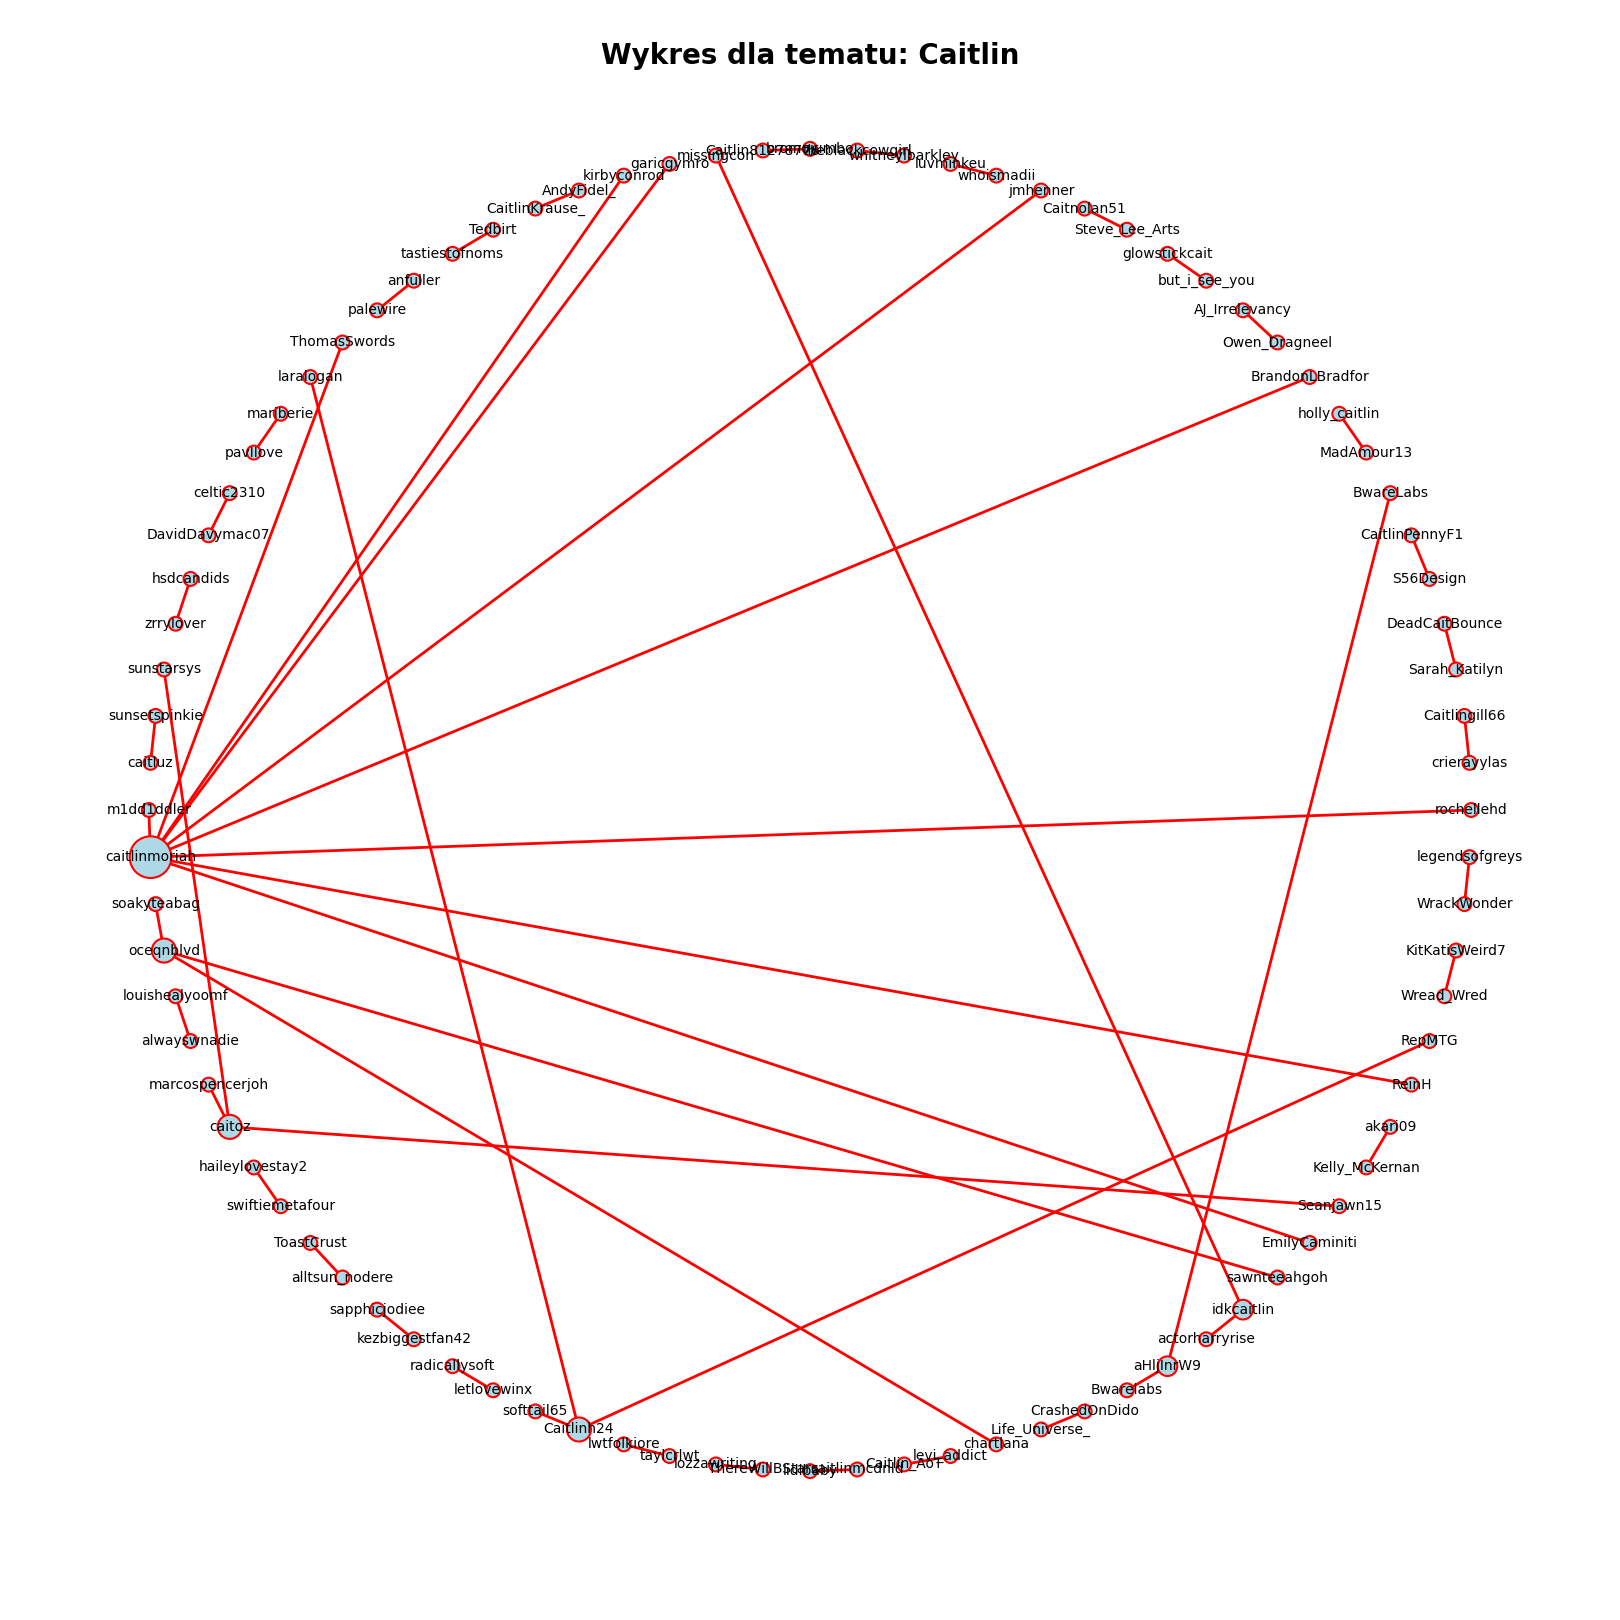

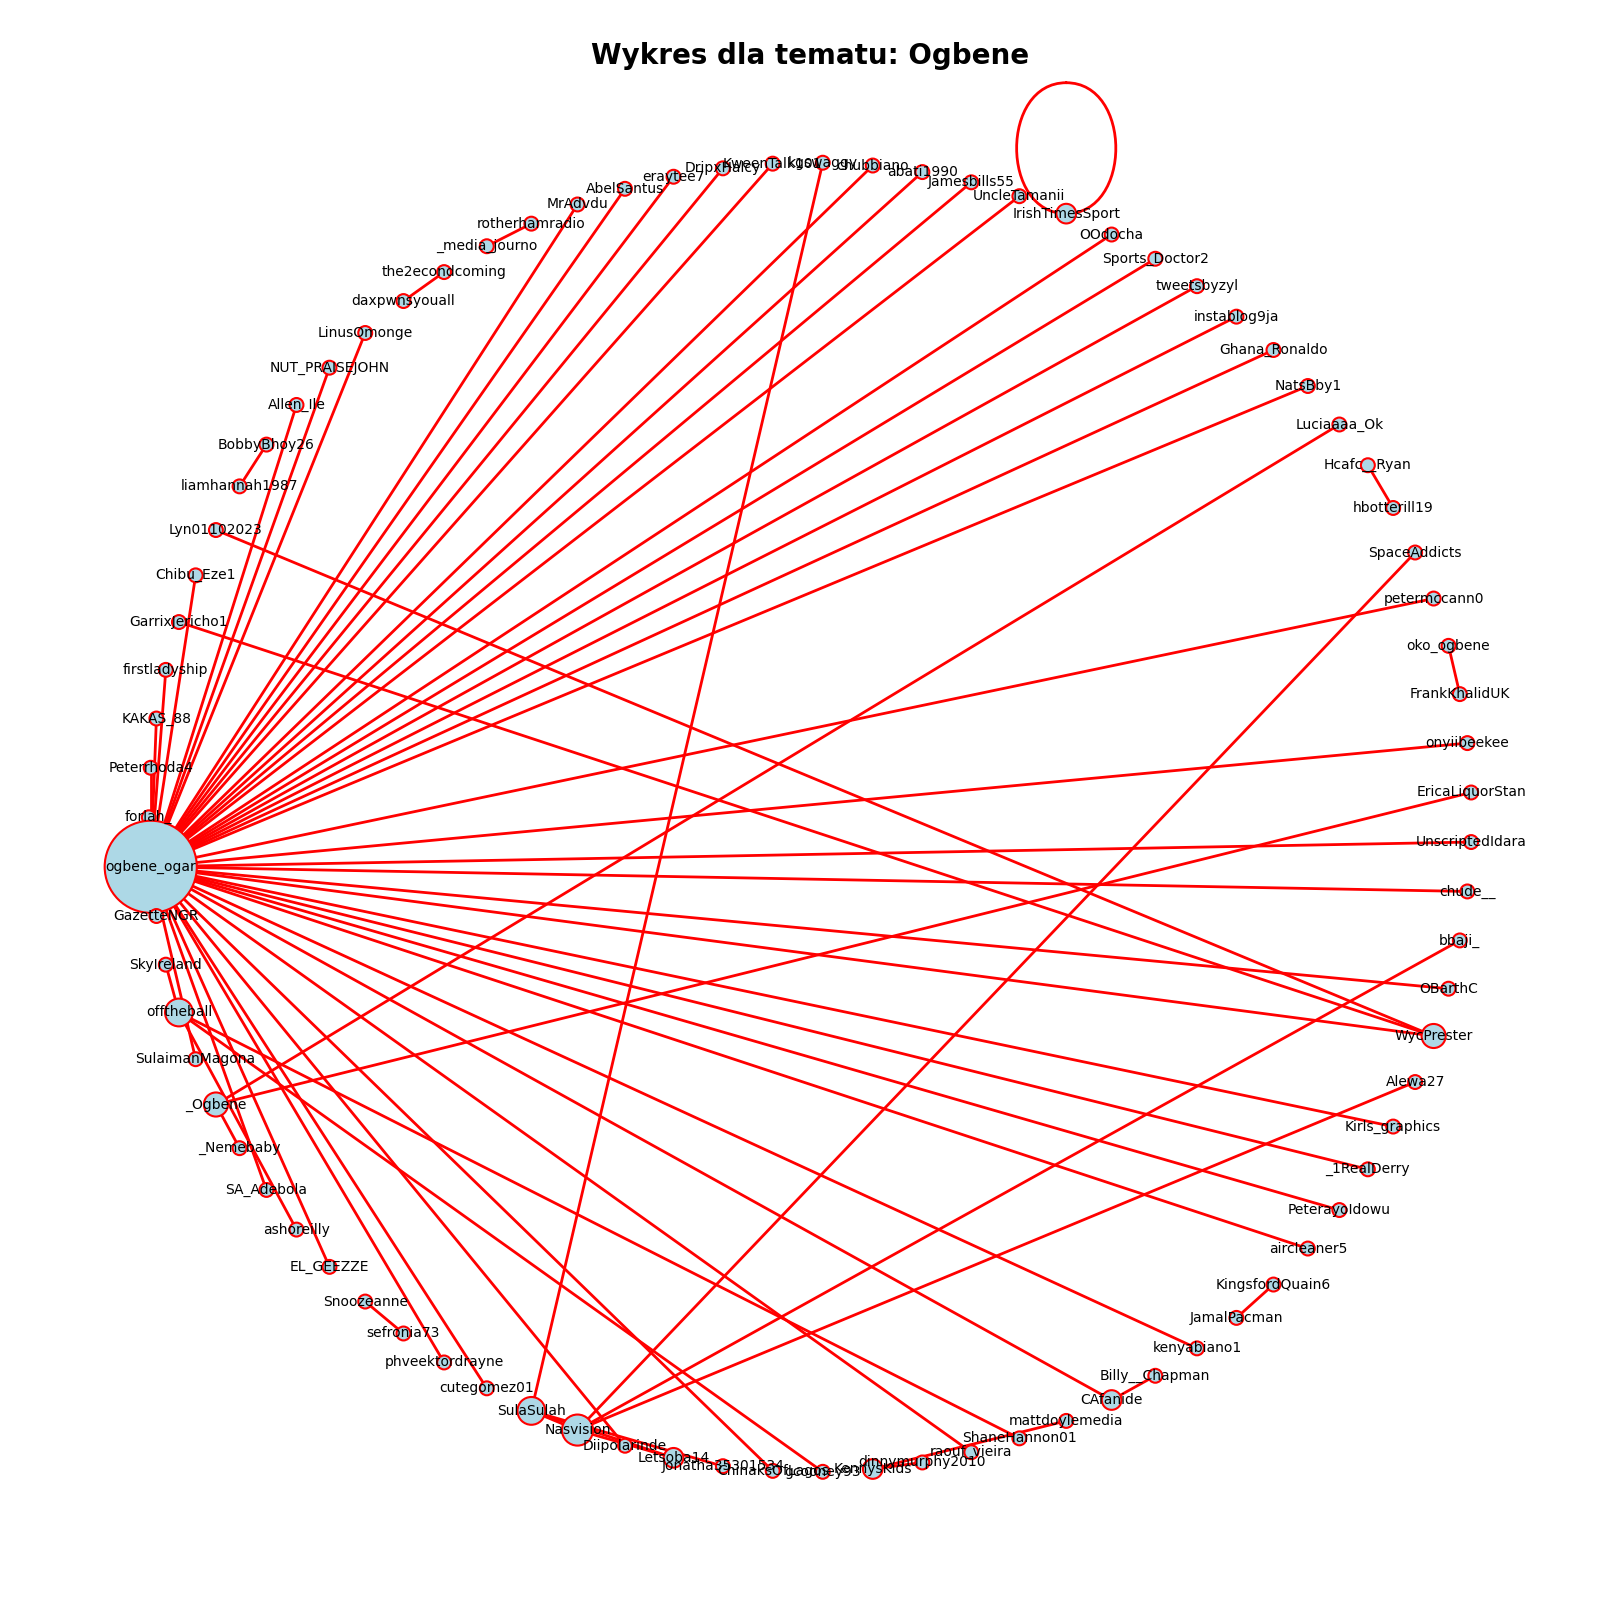

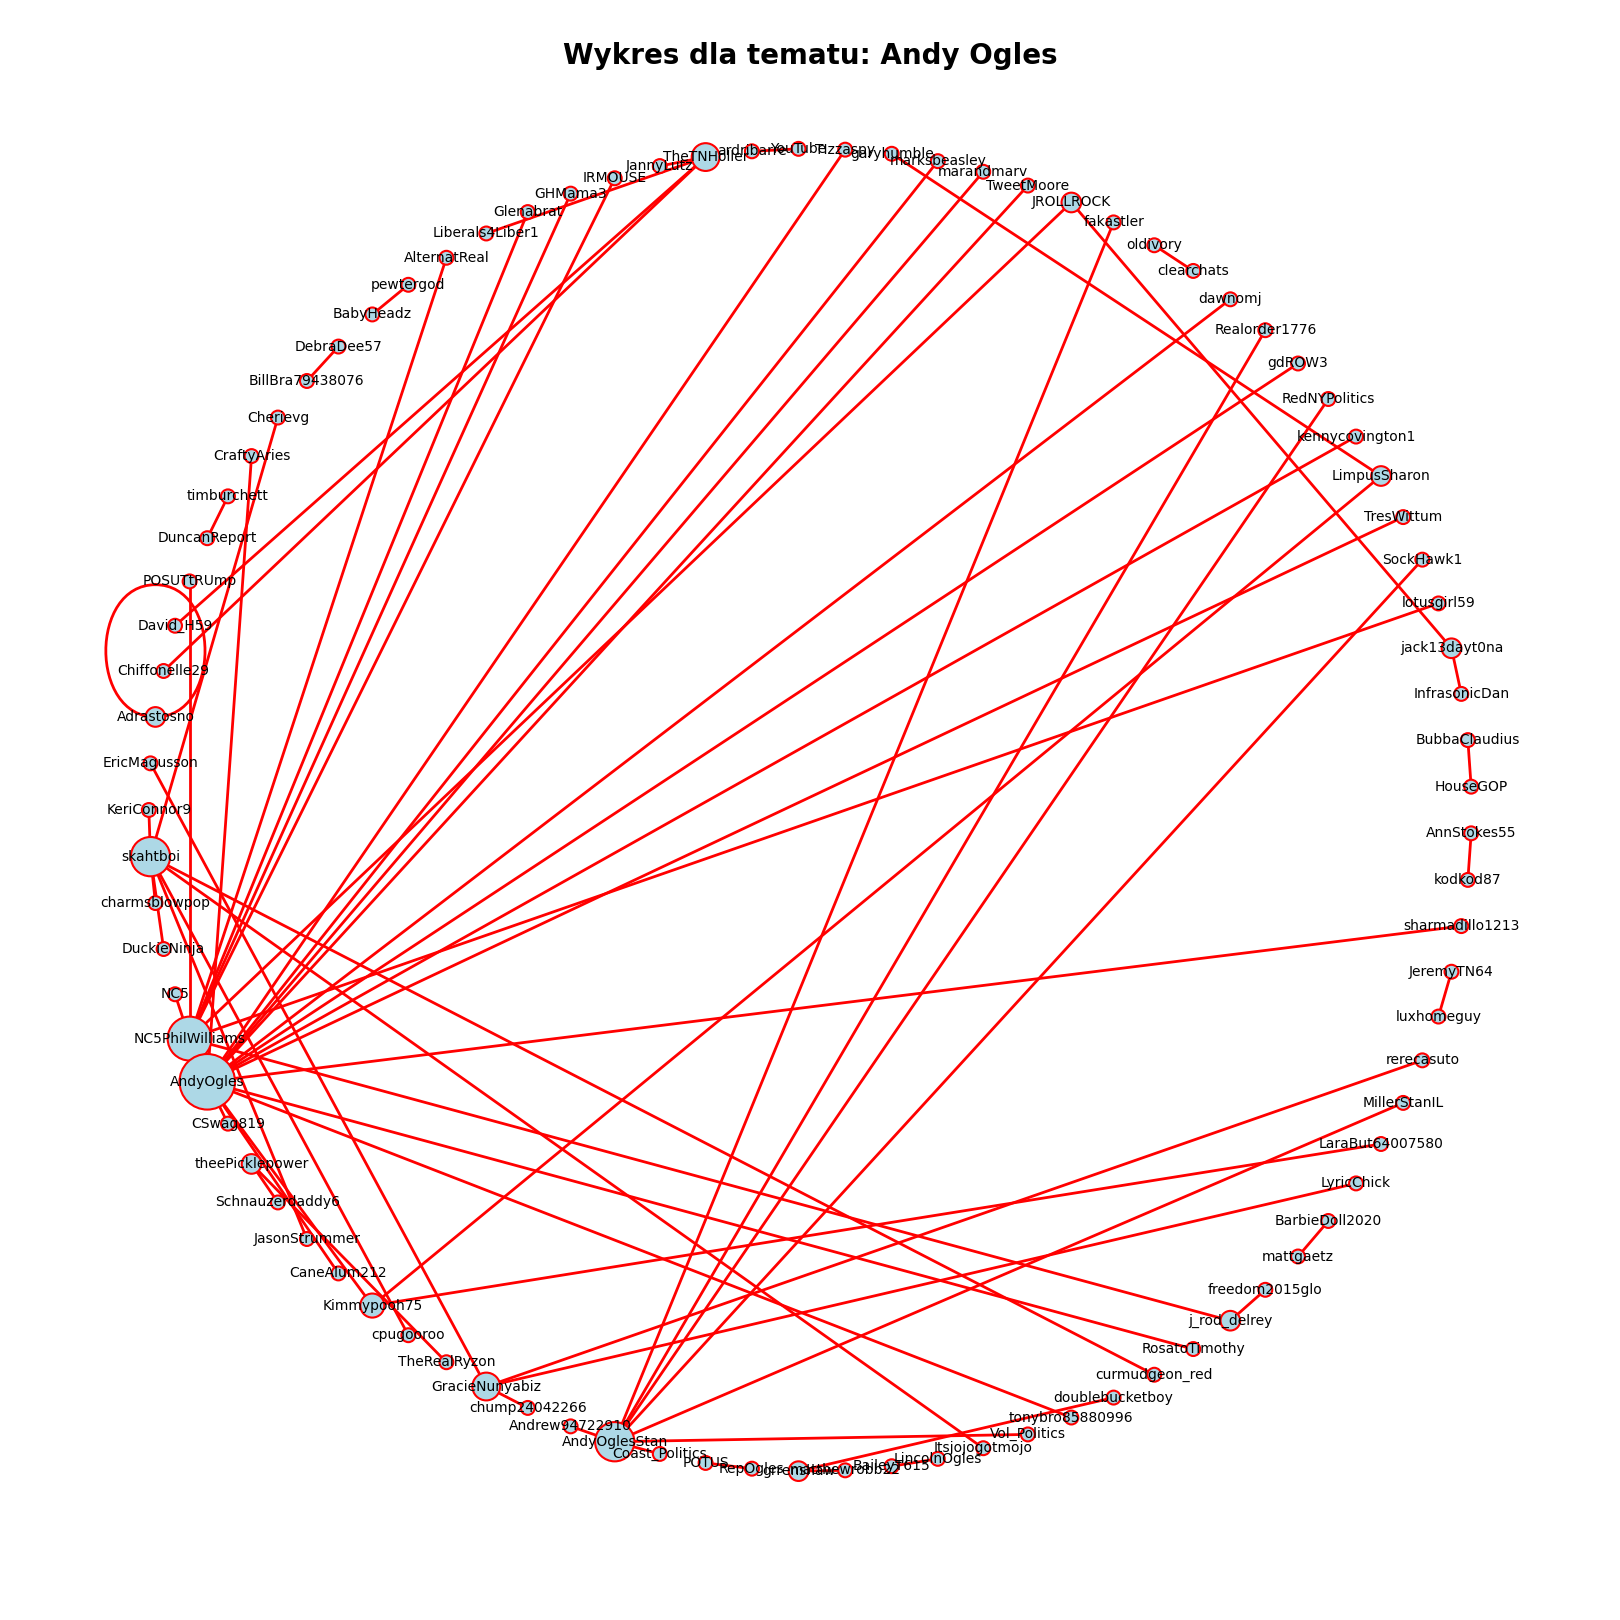

In [65]:
for topic in df_first_mentions["topic"].unique():
    df_cos = df_first_mentions[df_first_mentions["topic"]==topic]
    siec = df_cos[["first_mention", "screen_name"]].value_counts().to_frame().reset_index()
    siec = siec.loc[siec[0] >= 2].rename(columns = {0: "Wystapienia"})

    G = nx.from_pandas_edgelist(siec, "first_mention", "screen_name", edge_attr= True)
    d = dict(G.degree())
    plt.figure()
    nx.draw_random(G, node_size=[v * 100 for v in d.values()])


In [66]:
df

SyntaxError: unterminated string literal (detected at line 1) (487523284.py, line 1)